# Parte 3: Modelo de regresión lineal múltiple
En este tercer archivo, se toma el dataset limpio de la muestra obtenida a partir del total de datos de la encuesta CASEN - 2017, para primero aplicar un modelo de regresión lineal múltiple, junto a ésto se va a realizar un ajuste para evaluar si el modelo de regresión va mejorando con la eliminación de ciertas variables. <br>
Cuando se llega a un punto en que, el modelo de regresión no siga mejorando, se pasa al análisis de supuestos de regresión, para analizar si estos se cumplen o no, para el último caso, se expone las posibles razones de por qué no se estaría cumpliendo el determinado supuesto. <br>
Finalmente, se comparan los resultados con un modelo de regresión lineal hecho previamente, con las mismas variables; pero con un dataset en el cual no se habían eliminado los valores outliers.

<hr>

# Aplicación del modelo de regresión lineal
Con el dataframe limpio e imputado se va a aplicar un modelo de regresión lineal múltiple sobre las siguientes variables:
- region
- zona
- sexo
- edad
- e1: analfabetismo
- e6a: nivel educacional más alto
- o4: si ha trabajado alguna vez
- oficio1: ocupación u oficio
- rama1: a qué negocio se dedica
- y1: salario líquido del trabajo principal
- y4a: si ha recibido bonificaciones en los últimos 12 meses
- s5: la edad que tenía cuando nació el primer hijo 
- r1a: nacionalidad
- ytrabajocor: ingreso del trabajo
- esc: escolaridad
- activ: condición de actividad económica <br>

Todo esto con el fin de poder generar un modelo de regresión lineal múltiple que permita predecir los años de escolaridad.

<hr>

In [9]:
get_ipython().magic('matplotlib inline')

import pandas as pd # Manipulación de datos
import seaborn as sns # Graficos
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm 
import statsmodels.formula.api as smf 
import statsmodels.stats.api as sms

from statsmodels.compat import lzip
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.outliers_influence import OLSInfluence
from statsmodels.graphics.regressionplots import plot_leverage_resid2
from statsmodels.stats.stattools import durbin_watson
from statsmodels.tools.eval_measures import mse

from sklearn.model_selection import train_test_split

## Se carga el dataset

In [2]:
df =pd.read_excel("CASEN2017_seleccionada_imputada.xlsx")
df.head()

,region,zona,sexo,edad,e1,e6a,o4,oficio1,rama1,y1,s5,r1a,ytrabajocor,esc,activ
0,Región de Tarapacá,Urbano,Mujer,56,"Sí, lee y escribe",Educación Media Científico-Humanista,No sabe/no responde,Trabajadores no calificado,Comercio al por mayor y al por menor,0,0,Otra nacionalidad. Especifique país,250000,12,Ocupados
1,Región de Tarapacá,Urbano,Mujer,21,"Sí, lee y escribe",Educación Básica,No sabe/no responde,Trabajadores no calificado,Hogares privados con servicio doméstico,200000,0,Otra nacionalidad. Especifique país,200000,7,Ocupados
2,Región de Tarapacá,Urbano,Hombre,24,"Sí, lee y escribe",Educación Media Científico-Humanista,No sabe/no responde,Trabajadores de los servicios y vendedores de ...,Hoteles y restaurantes,270000,0,Chilena (Exclusiva),281750,12,Ocupados
3,Región de Tarapacá,Urbano,Hombre,28,"Sí, lee y escribe",Educación Media Científico-Humanista,No sabe/no responde,Trabajadores de los servicios y vendedores de ...,Hoteles y restaurantes,300000,0,Otra nacionalidad. Especifique país,311750,12,Ocupados
4,Región de Tarapacá,Urbano,Hombre,26,"Sí, lee y escribe",Técnico Nivel Superior Completo (Carreras 1 a ...,No sabe/no responde,Trabajadores no calificado,Hogares privados con servicio doméstico,320000,25,Otra nacionalidad. Especifique país,341667,15,Ocupados


## Datos básicos de la fuente de información

In [3]:
print("===================================================================")
print("Tamaño del dataframe:")
print(df.shape)
print("===================================================================")
print("Cantidad de valores nulos por columna:")
print(df.isna().sum())
print("===================================================================")
print("Tipo de variable de las columnas:")
print(df.dtypes)
print("===================================================================")

Tamaño del dataframe:
(84546, 15)
Cantidad de valores nulos por columna:
region         0
zona           0
sexo           0
edad           0
e1             0
e6a            0
o4             0
oficio1        0
rama1          0
y1             0
s5             0
r1a            0
ytrabajocor    0
esc            0
activ          0
dtype: int64
Tipo de variable de las columnas:
region         object
zona           object
sexo           object
edad            int64
e1             object
e6a            object
o4             object
oficio1        object
rama1          object
y1              int64
s5              int64
r1a            object
ytrabajocor     int64
esc             int64
activ          object
dtype: object


## Modelo de regresión lineal

In [4]:
# Formula
formula_escolaridad = "esc~s5+C(e1)+C(o4)+C(oficio1)+C(rama1)+y1+C(region)+C(zona)+C(sexo)+edad+C(r1a)+ytrabajocor+C(activ)"

### Modelo para predecir escolaridad

In [5]:
# Implementacion de modelo
modelo_escolaridad = smf.ols(formula = formula_escolaridad, data = df)

# ajuste de modelo
res_escolaridad = modelo_escolaridad.fit()

# resumen de modelo
res_escolaridad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    esc   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     1542.
Date:                Mon, 09 Aug 2021   Prob (F-statistic):               0.00
Time:                        21:12:17   Log-Likelihood:            -2.0307e+05
No. Observations:               84546   AIC:                         4.063e+05
Df Residuals:                   84487   BIC:                         4.068e+05
Df Model:                          58                                         
Covariance Type:            nonrobust                                         
==============================================================================================================================================
                                                                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                     11.3891      0.403     28.247      0.000      10.599      12.179
C(e1)[T.No, ninguno]                                                          -5.0170      0.335    -14.963      0.000      -5.674      -4.360
C(e1)[T.No, sólo escribe]                                                     -1.3826      0.368     -3.757      0.000      -2.104      -0.661
C(e1)[T.No, sólo lee]                                                         -3.0211      0.350     -8.643      0.000      -3.706      -2.336
C(e1)[T.Sí, lee y escribe]                                                     0.4847      0.329      1.472      0.141      -0.161       1.130
C(o4)[T.No sabe/no responde]                                                   0.8094      0.521      1.554      0.120      -0.211       1.830
C(o4)[T.Sí]                                                                    0.6338      0.090      7.062      0.000       0.458       0.810
C(oficio1)[T.Empleados de oficina]                                             1.7510      0.062     28.076      0.000       1.629       1.873
C(oficio1)[T.Fuerzas Armada]                                                   1.5096      0.173      8.734      0.000       1.171       1.848
C(oficio1)[T.Miembros del poder ejecutivo y de los cuerpos legislativo]        1.4923      0.073     20.328      0.000       1.348       1.636
C(oficio1)[T.Oficiales, operarios y artesanos de artes mecánicas y de otr]     0.5788      0.057     10.120      0.000       0.467       0.691
C(oficio1)[T.Operadores de instalaciones y máquinas y montadore]               0.6078      0.061     10.014      0.000       0.489       0.727
C(oficio1)[T.Profesionales, científicos e intelectuale]                        4.6859      0.069     68.269      0.000       4.551       4.820
C(oficio1)[T.Sin dato]                                                         0.8946      0.191      4.691      0.000       0.521       1.268
C(oficio1)[T.Trabajadores de los servicios y vendedores de comerci]            0.9253      0.057     16.289      0.000       0.814       1.037
C(oficio1)[T.Trabajadores no calificado]                                      -0.0017      0.050     -0.035      0.972      -0.099       0.095
C(oficio1)[T.Técnicos profesionales de nivel medi]                             2.8613      0.062     46.133      0.000       2.740       2.983
C(rama1)[T.Administración pública y defensa]                                  -0.3178      0.064     -5.003      0.000      -0.442      -0.193
C(rama1)[T.Agricultura, ganadería, caza y silvicultura]                       -1

### Interpretación del reporte
Primero, se ve que el $R^2$ ajustado, es de 0.514, lo cual se traduce que, con las variables empleadas de momento se tiene un 51,4% de presición del modelo. Se aprecia que el intercepto es positivo, por ende no deberían existir valores de años de escolaridad negativos.
Se va a evaluar una mejora del modelo con la eliminación de ciertas variables, con el fin de observar si el $R^2$ tiende a mejorar.
<hr>

# Eliminación de variables
A continuación se procede a ir eliminando manualmente cada una de las variables y recalculando el ajuste de la regresión lineal, con el objetivo de observar si ésta tiende a una mejora.

<hr>

## Eliminación de la variable C(oficio1)[T.Trabajadores no calificado]	
Eliminar esta variable de tipo categórica, de acuerdo al EDA realizado anteriormente, equivale al borrado de 20.321 registros en total del dataset. Es la que posee un p-valor más alto dentro del reporte de regresión lineal anteriormente descrito (0.972), por lo que se debería observar una mejora en el modelo.

In [6]:
# Se eliminan todos los registros de "Trabajadjos no calificados" del dataset
df = df.drop(df[df.oficio1 == "Trabajadores no calificado"].index)
df.shape

(64225, 15)

In [7]:
# Implementacion de modelo con los cambios aplicados
modelo_escolaridad = smf.ols(formula = formula_escolaridad, data = df)

# ajuste de modelo
res_escolaridad = modelo_escolaridad.fit()

# resumen de modelo
res_escolaridad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    esc   R-squared:                       0.526
Model:                            OLS   Adj. R-squared:                  0.526
Method:                 Least Squares   F-statistic:                     1251.
Date:                Mon, 09 Aug 2021   Prob (F-statistic):               0.00
Time:                        21:12:24   Log-Likelihood:            -1.5299e+05
No. Observations:               64225   AIC:                         3.061e+05
Df Residuals:                   64167   BIC:                         3.066e+05
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
==============================================================================================================================================
                                                                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                     10.6496      0.457     23.312      0.000       9.754      11.545
C(e1)[T.No, ninguno]                                                          -4.5487      0.398    -11.420      0.000      -5.329      -3.768
C(e1)[T.No, sólo escribe]                                                     -0.9803      0.434     -2.256      0.024      -1.832      -0.129
C(e1)[T.No, sólo lee]                                                         -2.4526      0.416     -5.890      0.000      -3.269      -1.636
C(e1)[T.Sí, lee y escribe]                                                     0.7309      0.391      1.869      0.062      -0.036       1.497
C(o4)[T.No sabe/no responde]                                                   0.8074      0.511      1.581      0.114      -0.193       1.808
C(o4)[T.Sí]                                                                    0.6264      0.088      7.109      0.000       0.454       0.799
C(oficio1)[T.Empleados de oficina]                                             2.0571      0.070     29.252      0.000       1.919       2.195
C(oficio1)[T.Fuerzas Armada]                                                   1.6341      0.174      9.375      0.000       1.292       1.976
C(oficio1)[T.Miembros del poder ejecutivo y de los cuerpos legislativo]        1.8418      0.080     22.922      0.000       1.684       1.999
C(oficio1)[T.Oficiales, operarios y artesanos de artes mecánicas y de otr]     0.8530      0.066     12.947      0.000       0.724       0.982
C(oficio1)[T.Operadores de instalaciones y máquinas y montadore]               0.8169      0.067     12.219      0.000       0.686       0.948
C(oficio1)[T.Profesionales, científicos e intelectuale]                        4.9988      0.077     64.887      0.000       4.848       5.150
C(oficio1)[T.Sin dato]                                                         1.1815      0.191      6.179      0.000       0.807       1.556
C(oficio1)[T.Trabajadores de los servicios y vendedores de comerci]            1.3065      0.066     19.706      0.000       1.177       1.436
C(oficio1)[T.Técnicos profesionales de nivel medi]                             3.1569      0.070     44.896      0.000       3.019       3.295
C(rama1)[T.Administración pública y defensa]                                  -0.1617      0.073     -2.226      0.026      -0.304      -0.019
C(rama1)[T.Agricultura, ganadería, caza y silvicultura]                       -1.0168      0.077    -13.144      0.000      -1.168      -0.865
C(rama1)[T.Comercio al por mayor y al por menor]                              -0

In [8]:
# Exportacion del nuevo dataset con la variable borrada
df_copia = df
# Se crea el objeto que escribe el dataset
writer = pd.ExcelWriter('DataCASEN2017_RGLM.xlsx')
# Se setea el data set sin los indices que atribuye pandas
df_copia.to_excel(writer, index=False)
# Se guarda el dataset en cuestion
writer.save()
print('Se ha exportado el excel.')

Se ha exportado el excel.


_Observaciones: se puede apreciar una mejora en el modelo con el ajuste aplicado. En este momento, el modelo posee un $R^2$ de 0.526, lo cual se traduce en que en que ahora posee un 52.6% de precisión._

__Nota:__ <br>
Se probó borrando las demás variables que poseen un p-valor por sobre de un 0.05; pero el $R^2$ no varió desde el porcentaje anteriormente descrito.
<hr>

# Comprobación de supuestos
Una vez ajustado y optimizado el modelo, se procede a la comprobación de los supuestos de:
- Linealidad
- Independencia de los residuos
- Normalidad de los residuos
- Homogeneidad de los residuos
- No colinealidad entre los predictores

## 1- Normalidad de los residuos
El objetivo de este supuesto, es comprobar cuál es el comportamiento de distribución de los residuos, en otras palabras, ver si éstos no tienden a alguna distribución de acuerdo a un análisis gráfico. También se emplea el test de Jarque-Bera, el cual involucra la kurtosis. Este sirve para identificar si los resíduos poseen una distribución normal u aleatoria.

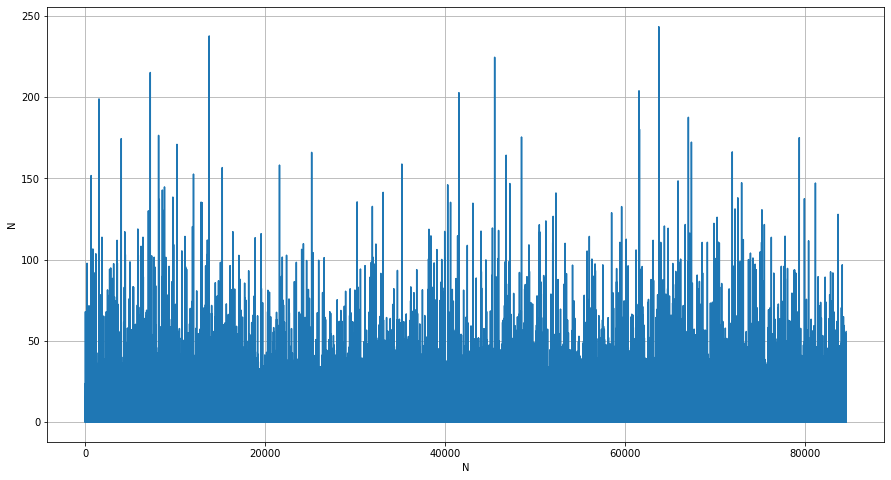

In [8]:
plt.figure(figsize=(15,8))
plt.figure(1)
plt.plot(res_escolaridad.resid**2)
plt.xlabel('N')
plt.ylabel('N')
plt.grid(True)
plt.show()

In [9]:
name = ['Jarque-Bera', 'Chi^2 two-tail prob.', 'Skew', 'Kurtosis']
test = sms.jarque_bera(res_escolaridad.resid)
lzip(name, test)

[('Jarque-Bera', 5584.644095163896),
 ('Chi^2 two-tail prob.', 0.0),
 ('Skew', -0.20580670331801967),
 ('Kurtosis', 4.384730719170001)]

El gráfico anterior nos muestra que, efectivamente los residuos no siguen ninguna lógica en sus valores, ya sea que vayan en ascenso, descenso o alguna distribución estadística conocida. Además el test de Jarque-Bera nos reafirma este supuesto, ya que su valor está por sobre el 0.05, por lo que se rechaza $H_0$, hipótesis relacionada a que los datos distribuyen normalmente.

C:\Python39\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
C:\Python39\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


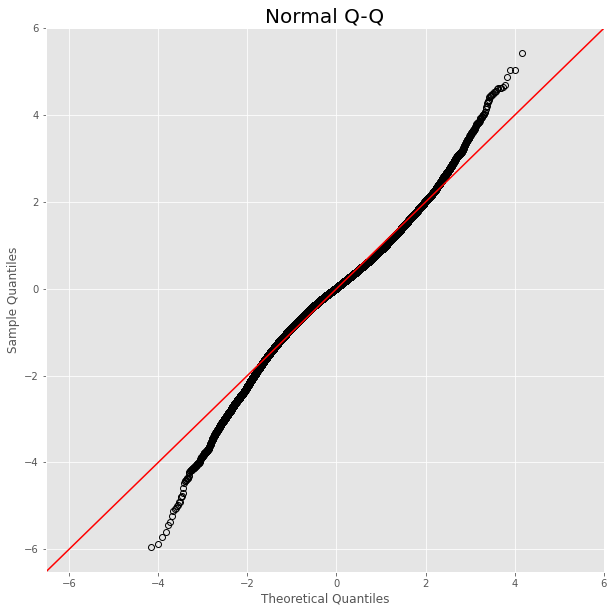

In [10]:
plt.rc('figure', figsize=(10,10))
plt.style.use('ggplot')

probplot = sm.ProbPlot(res_escolaridad.get_influence().resid_studentized_internal, fit=True)
fig = probplot.qqplot(line='45', marker='o', color='black',markerfacecolor='none')
plt.title('Normal Q-Q', fontsize=20)
plt.show()

En la linealidad de residuos, se observa que en los extremos los valores se tienden a alejar de la recta por lo que habría que entrar a evaluar y analizar con más detalle estos casos de borde. Se puede dar por exceso de casos outliers en el dataset empleado o a que se requiera eliminar aún más variables estadísticamente significativas.

<hr>

## 2- No colinealidad entre los predictores  (o multicolinealidad)
La idea de este supuesto, es comprobar si existe una relación lineal entre las variales. Esto ocurre debido a que puede haber variables que se expliquen mediante otras variables, por lo que puede generar información redundante. <br>
Debido a que no existe un método estadístico concreto para determinar la existencia de multicolinealidad entre predictores de una regresión, se han ideado índices como el de Tolerancia (TOL) y el Factor de Inflación de la Varianza (VIF). Se emplea el VIF para determinar la existencia o ausencia total de colinealidad en función del siguiente criterio:
- VIF = 1 : ausencia total de colinealidad
- 1 < VIF < 5 : la regresión puede verse afectada por cierta colinealidad
- 5 < VIF < 10 : la regresión puede verse altamente afectada por cierta colinealidad <br>

Los factores se calculan como:
\begin{equation}
    VIF = \frac{1}{1 - R^2}
\end{equation}

<br>

\begin{equation}
    TOL = \frac{1}{VIF}
\end{equation}

In [15]:
variables = modelo_escolaridad.exog
vif = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
df_vif = round(pd.DataFrame(res_escolaridad.params),2)
df_vif

,0
Intercept,10.65
"C(e1)[T.No, ninguno]",-4.55
"C(e1)[T.No, sólo escribe]",-0.98
"C(e1)[T.No, sólo lee]",-2.45
"C(e1)[T.Sí, lee y escribe]",0.73
C(o4)[T.No sabe/no responde],0.81
C(o4)[T.Sí],0.63
C(oficio1)[T.Empleados de oficina],2.06
C(oficio1)[T.Fuerzas Armada],1.63
C(oficio1)[T.Miembros del poder ejecutivo y de los cuerpos legislativo],1.84


In [11]:
np.linalg.cond(res_escolaridad.model.exog)

57709503.70691039

De acuerdo al dataset generado con los valores VIF, se puede apreciar que sólo exceden el valor de 5 la variable:
- C(oficio1)[T.Profesionales, científicos e intelectuale] <br>

Esto se puede interpretar que ésta posee un alto nivel de colinealidad. Finalmente aquellas variables que presentan un bajo nivel de colinealidad sobre el modelo son:
- C(oficio1)[T.Empleados de oficina]	
- C(oficio1)[T.Fuerzas Armada]
- C(oficio1)[T.Miembros del poder ejecutivo y de los cuerpos legislativo]
- C(oficio1)[T.Sin dato]
- C(oficio1)[T.Trabajadores de los servicios y vendedores de comerci]	
- C(oficio1)[T.Técnicos profesionales de nivel medi]	

_Observación: se desconoce cómo abordar aquellos casos en que el VIF es un valor negativo, se buscó en diferentes sitios; pero no se pudo encontrar alguno que pudiese dar alguna interpretación al respecto._

<hr>

## 3- Linealidad
El objetivo de este test, es observar si la dispersión de puntos posee una tendencia determinada

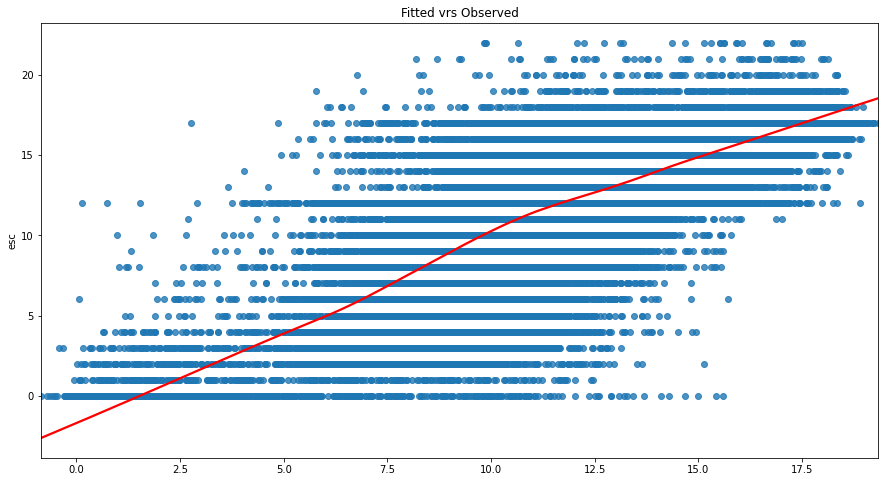

In [12]:
#Linearity in model
plt.figure(figsize=(15,8))
sns.regplot(x=fitted_val, y=df['esc'], lowess=True, line_kws={'color': 'red'})
plt.title('Fitted vrs Observed')
plt.show()

C:\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Residuals')

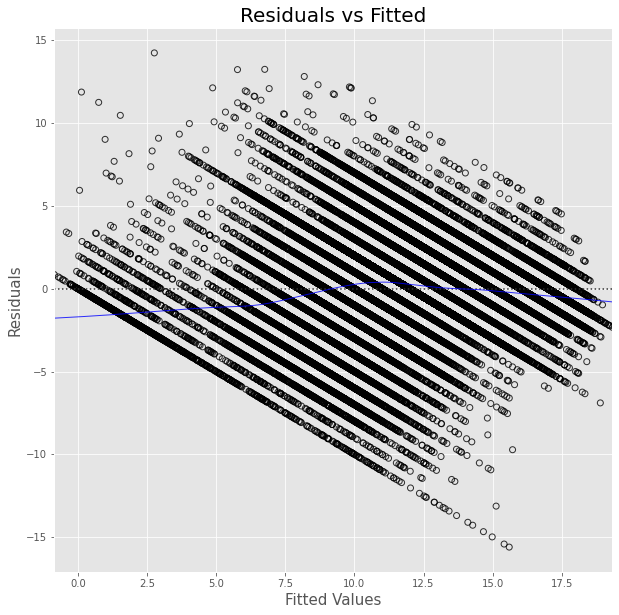

In [29]:
sns.residplot(res_escolaridad.fittedvalues, 'esc', data=df, 
                          lowess=True, 
                          scatter_kws={'facecolors':'none', 'edgecolors':'black'}, 
                          line_kws={'color': 'blue', 'lw': 1, 'alpha': 0.8})

plt.title('Residuals vs Fitted', fontsize=20)
plt.xlabel('Fitted Values', fontsize=15)
plt.ylabel('Residuals', fontsize=15)

En los dos gráficos de linealidad, se puede apreciar como es que al dispersión de puntos sigue un sentido específico. Puntualmente, para la última gráfica se aprecia con mucha claridad que los puntos tienden a un claro descenso, por lo que existe esta linealidad.

<hr>

## 4- Homogeneidad de varianza (Heterocedasticidad)
El test de heterocedasticidad corresponde a observar los valores $y$ y $\epsilon$, si éstos poseen la misma varianaza por cada valor predicho. 

In [27]:
name = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sms.het_breuschpagan(res_escolaridad.resid, res_escolaridad.model.exog)
lzip(name, test)

[('Lagrange multiplier statistic', 3602.244876590634),
 ('p-value', 0.0),
 ('f-value', 66.89204018537099),
 ('f p-value', 0.0)]

In [28]:
breuschpagan_p= sms.het_breuschpagan(res_escolaridad.resid, res_escolaridad.model.exog)[1]
print(breuschpagan_p)
if breuschpagan_p> 0.05:
  print("La relación no es heterocedástica")
if breuschpagan_p <0.05:
  print("La relación es heterocedastica")

0.0
La relación es heterocedastica


Se observa finalmente que, la relación es heterocedastica, o sea, que en el modelo la variabilidad es diferente para cada observación o predición realizada.

<hr>

## 5- Independencia de los residuos
Este test corresponde a que, cada observación es independiente entre sí. Es importante para las series de tiempo, donde para cada valor predicho (variable dependiente) por cada variable independiente, no influye sobre cada una de las variables independientes. Para esto se emplea el test de Durbin-Watson facilitado por el mismo reporte que se obtiene al momento de aplicar el modelo de regresión lineal. Este valor puede osilar entre 0 y 4 donde:
- Más cercano a 0 indica mayor evidencia de correlación positiva.
- Más cercano a 4 indica mayor evidencia de correlación negativa. <br>

En general, si este indicador es menor a 1, puede ser una evidencia de la presencia de autocorrelación. Si es mayor a 2, indica que los términos de errores sucesivos están correlacionados de forma negativa, lo cual se puede entender como una subestimación del nivel de significancia.

Para este supuesto, el test de Durbin-Watson dió el valor de 1.730 (véase reporte entregado por la última ejecución del modelo). El valor de este test al estar cercano a 2, nos indica que existe una leve autocorrelación negativa. Esto quiere decir que:
- Para un error positivo (_falso positivo_) para una observación, aumenta la probabilidad de un error negativo (_falso negativo_) para otra observación.
- Para un error negativo (_falso negativo_) para una observación, aumenta la probabilidad de un error positivo (_falso positivo_) para otra observación.

<hr>

# Comprobación del modelo

In [15]:
# Variables dummies
columnas_cat = ["region", "zona", "sexo", "e1", "e6a", "o4", "oficio1", "rama1", "r1a","activ"]
df_completo = pd.get_dummies(df, columns = columnas_cat)
df_completo

,edad,y1,s5,ytrabajocor,esc,region_Región Metropolitana de Santiago,region_Región de Antofagasta,region_Región de Arica y Parinacota,region_Región de Atacama,region_Región de Ayséndel Gral. Carlos Ibáñez del Campo,...,rama1_Servicios sociales y de salud,rama1_Sin dato,"rama1_Suministro de electricidad, gas y agua","rama1_Transporte, almacenamiento y comunicaciones",r1a_Chilena (Exclusiva),r1a_Chilena y otra (Doble nacionalidad),r1a_Otra nacionalidad. Especifique país,activ_Desocupados,activ_Inactivos,activ_Ocupados
2,24,270000,0,281750,12,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,28,300000,0,311750,12,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
6,59,270000,17,595000,12,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
7,23,270000,22,540000,14,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
8,23,270000,22,540000,12,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84538,59,0,22,404167,11,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
84540,63,0,20,310000,12,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
84541,40,0,34,562500,8,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
84544,60,0,23,250000,3,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1


In [16]:
# Se copian las variables independientes a X (todas menos escolaridad) y la dependiente a Y (escolaridad)
X = df_completo.drop("esc", axis = 1) # variables independientes
Y = df_completo["esc"]

In [17]:
# se divide la muestra de datos en un set de entreamiento y otro de prueba (70 - 30)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 5)
print("===============================================================")
print("Tamaño de datos de entrenamiento: ")
print("X: ",X_train.shape)
print("Y: ",Y_train.shape)
print("===============================================================")
print("Tamaño de datos de testing: ")
print("X: ",X_test.shape)
print("T: ",Y_test.shape)
print("===============================================================")

Tamaño de datos de entrenamiento: 
X:  (44957, 83)
Y:  (44957,)
Tamaño de datos de testing: 
X:  (19268, 83)
T:  (19268,)


In [18]:
X_train = sm.add_constant(X_train)
results = sm.OLS(Y_train, X_train).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    esc   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     6405.
Date:                Mon, 09 Aug 2021   Prob (F-statistic):               0.00
Time:                        21:18:36   Log-Likelihood:                -69134.
No. Observations:               44957   AIC:                         1.384e+05
Df Residuals:                   44883   BIC:                         1.391e+05
Df Model:                          73                                         
Covariance Type:            nonrobust                                         
========================================================================================================================================
                                                                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------
const                                                                    2.4711      0.029     85.882      0.000       2.415       2.528
edad                                                                    -0.0095      0.000    -20.021      0.000      -0.010      -0.009
y1                                                                   -1.048e-07   3.27e-08     -3.205      0.001   -1.69e-07   -4.07e-08
s5                                                                       0.0034      0.001      6.739      0.000       0.002       0.004
ytrabajocor                                                            4.17e-07   3.84e-08     10.848      0.000    3.42e-07    4.92e-07
region_Región Metropolitana de Santiago                                  0.1484      0.013     11.321      0.000       0.123       0.174
region_Región de Antofagasta                                             0.1803      0.027      6.588      0.000       0.127       0.234
region_Región de Arica y Parinacota                                      0.1840      0.026      6.994      0.000       0.132       0.236
region_Región de Atacama                                                 0.1315      0.031      4.297      0.000       0.071       0.191
region_Región de Ayséndel Gral. Carlos Ibáñez del Campo                 -0.0054      0.032     -0.172      0.864      -0.067       0.057
region_Región de Coquimbo                                                0.1849      0.025      7.290      0.000       0.135       0.235
region_Región de La Araucanía                                            0.1220      0.019      6.341      0.000       0.084       0.160
region_Región de Los Lagos                                               0.1512      0.021      7.362      0.000       0.111       0.191
region_Región de Los Ríos                                                0.2003      0.023      8.543      0.000       0.154       0.246
region_Región de Magallanes y de la Antártica Chilena                    0.0948      0.028      3.412      0.001       0.040       0.149
region_Región de Tarapacá                                                0.1613      0.024      6.752      0.000       0.114       0.208
region_Región de Valparaíso                                              0.1874      0.018     10.165      0.000       0.151       0.224
region_Región de Ñuble                                                   0.1827      0.027      6.713      0.000       0.129       0.236
region_Región del Biobío                                                 0.1537      0.017      8.857      0.000       0.120       0.188
region_Región del Libertador Gral. Bernardo O’Higgins                

In [20]:
X_test = sm.add_constant(X_test)

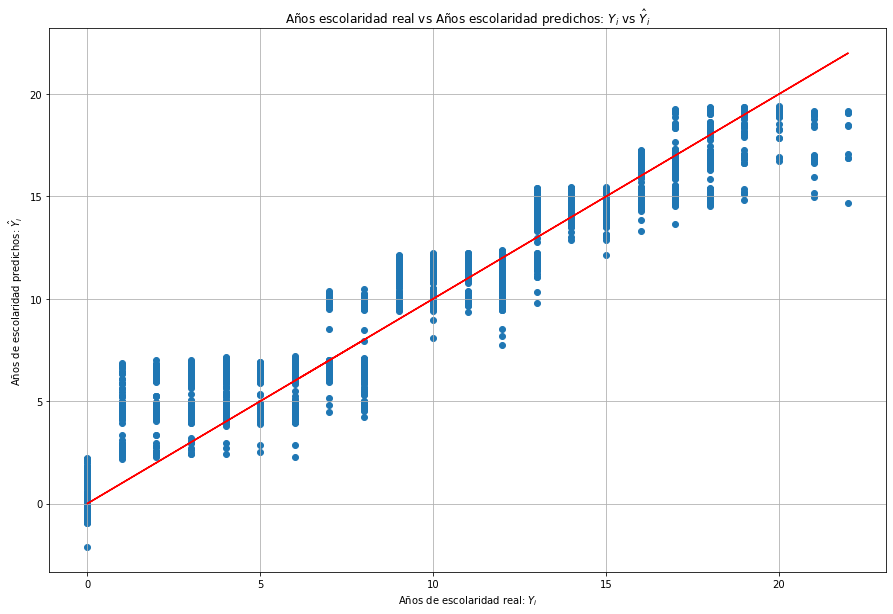

In [29]:
Y_preds = results.predict(X_test)

plt.figure(figsize=(15,10))
plt.grid()
plt.scatter(Y_test, Y_preds)
plt.plot(Y_test, Y_test, color="red")
plt.xlabel("Años de escolaridad real: $Y_i$")
plt.ylabel("Años de escolaridad predichos: $\hat{Y}_i$")
plt.title("Años escolaridad real vs Años escolaridad predichos: $Y_i$ vs $\hat{Y}_i$")
plt.show()

In [37]:
Y_test_arr = Y_test.to_numpy()
Y_preds_arr = Y_preds.to_numpy()
Y_preds_arr = Y_preds_arr.astype(int)
print("===================================================")
print("Datos reales: ")
print(Y_test_arr)
print("===================================================")
print("Datos predichos: ")
print(Y_preds_arr)
print("===================================================")

Datos reales: 
[ 6 12 16 ...  8 12  8]
Datos predichos: 
[ 6 11 17 ...  6 11  6]


In [39]:
# Creacion del dataframe
df_resultados_esc = pd.DataFrame({"Y_test": Y_test_arr, "Y_pred": Y_preds_arr})
df_resultados_esc.head(30)

,Y_test,Y_pred
0,6,6
1,12,11
2,16,17
3,12,11
4,12,11
5,16,16
6,5,6
7,12,11
8,12,11
9,5,6


In [27]:
print("Mean Squared Error (MSE) : {}".format(mse(Y_test, Y_preds)))

Mean Squared Error (MSE) : 1.252738828831331


# Conclusiones
Se puede apreciar que el modelo posee un porcentaje de acierto de un 52.6% con las variables empleadas. Cumple en cierta medida con los supuestos realizados:
- Los residuos se comportan de forma aleatoria
- Sólo una variable posee un alto nivel de colinealidad, por lo que sería pertinente eliminarla del modelo para observar una mejora
- En cuanto a la linealidad de los registros, se puede apreciar una tendencia en estos al visualizar ambos gráficos
- Existe homogeneidad en la varianza
- Los residuos tienden tienen una leve autocorrelación negativa entre sí (lo cual resulta coherente al observar los resultados VIF)<br>

En general el modelo se puede "mejorar" si se eliminan los casos de outliers y posteriormente se analizan las variables que son significativas (p-valor > 0.05).

<hr>

Particularmente, se realizó un modelo de regresión lineal con una muestra si borrar los casos outliers y los resultados de este, fue que inicialmente partió con un 55.9% de acierto.

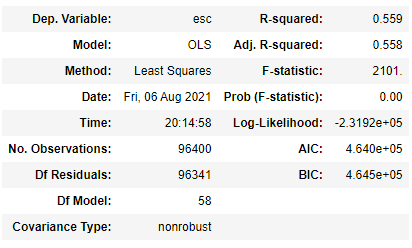

Este valor mejoró hasta un 56% eliminando ciertas variables con un alto nivel de significancia.

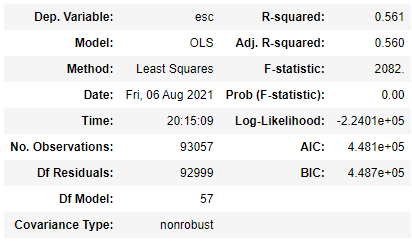

Respecto a los datos de los supuestos, se observó que los residuos se comportaron de forma aleatoria.

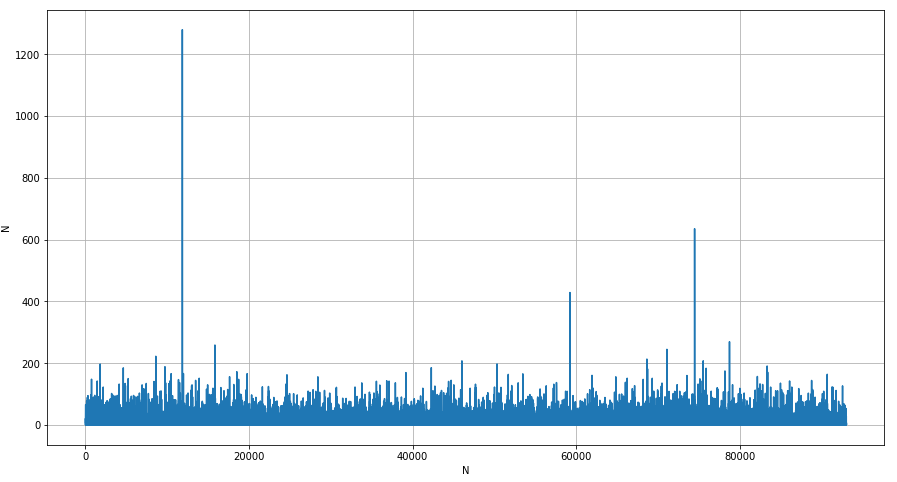

También se vió cierta tendencia de éstos sobre la linealidad, exceptuando por los extremos.

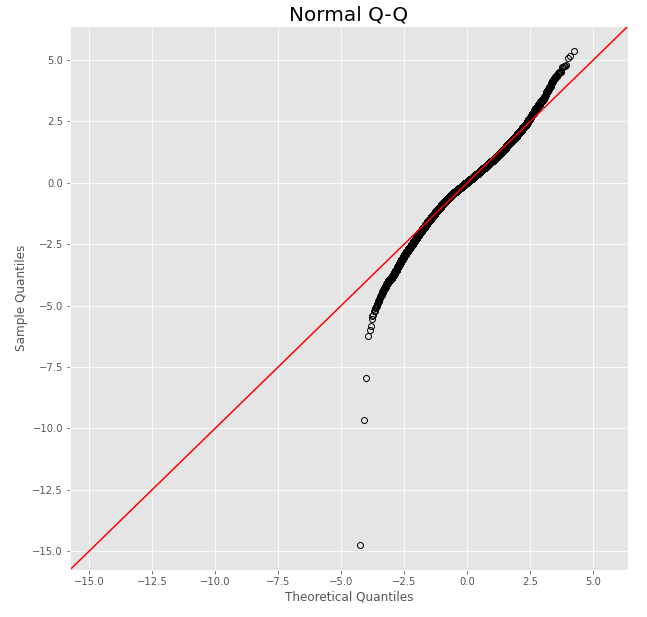

Pero al momento observar la linealidad del modelo, se obtuvieron los siguientes resultados:

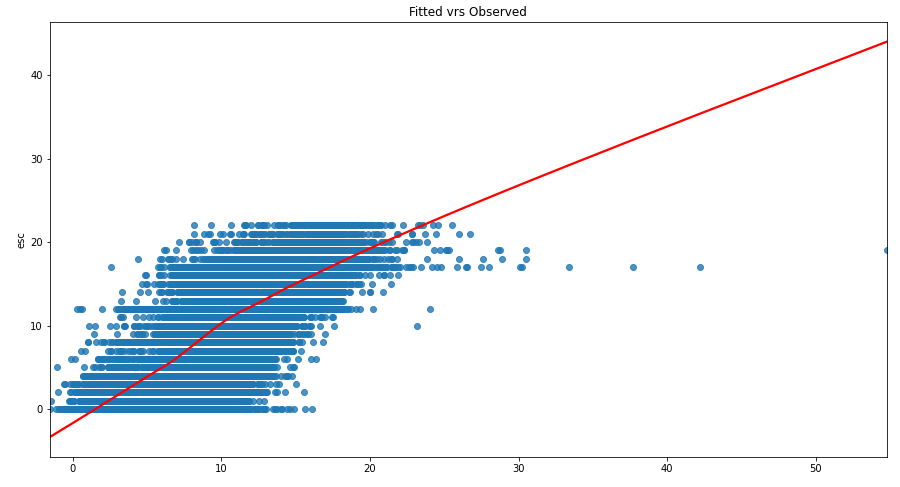

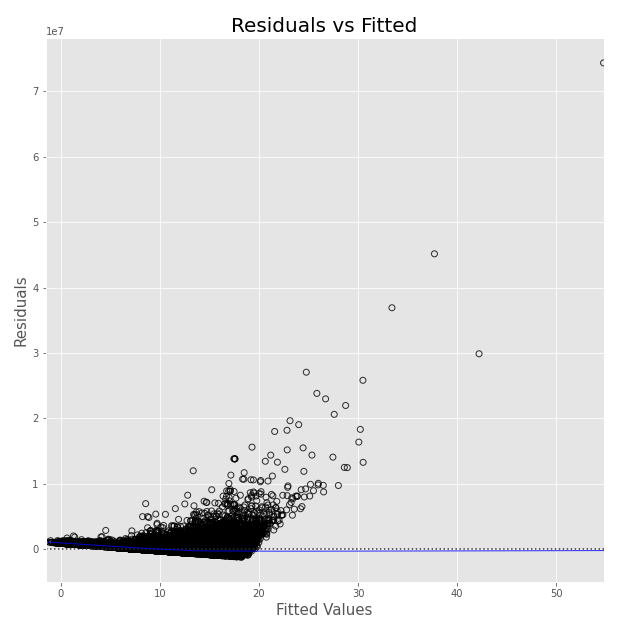

En el segundo gráfico, se puede observar cómo es que los casos de tipo outliers influyeron de forma negativa en el modelo, ya que no se puede observar una clara tendencia. Esto quiere decir que, a pesar de que el modelo poseía un mayor porcentaje de acierto, este __no era exacto__ debido a la influencia de los valores outliers de las variables analizadas. <br>
Si este el último gráfico de linealidad, se compara con el obtenido sobre la muestra que si posee eliminado los casos outliers, se puede apreciar como es que este último si expone una clara tendencia de los datos.

A continuación (si es que no se reinició todo el notebook) se puede apreciar con más detalle, cómo se trabajó con dicho modelo y los resultados que se fueron dando.

<hr>

<hr>

<hr>

# NO EJECUTAR LAS SIGUIENTES LÍNEAS DE CÓDIGO
NO SE DEBEN EJECUTAR LAS SIGUIENTES LÍNEAS DE CÓDIGO, PUESTO QUE CORRESPONDEN A LA EJECUCIÓN DEL DATASET SIN LA ELIMINACIÓN DE LOS VALORES OUTLIERS.

In [13]:
# Implementacion de modelo
modelo_escolaridad = smf.ols(formula = formula_escolaridad, data = df)

# ajuste de modelo
res_escolaridad = modelo_escolaridad.fit()

# resumen de modelo
res_escolaridad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    esc   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.558
Method:                 Least Squares   F-statistic:                     2101.
Date:                Fri, 06 Aug 2021   Prob (F-statistic):               0.00
Time:                        20:14:58   Log-Likelihood:            -2.3192e+05
No. Observations:               96400   AIC:                         4.640e+05
Df Residuals:                   96341   BIC:                         4.645e+05
Df Model:                          58                                         
Covariance Type:            nonrobust                                         
==============================================================================================================================================
                                                                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                     11.5366      0.383     30.105      0.000      10.786      12.288
C(e1)[T.No, ninguno]                                                          -4.9692      0.318    -15.611      0.000      -5.593      -4.345
C(e1)[T.No, sólo escribe]                                                     -1.1935      0.350     -3.409      0.001      -1.880      -0.507
C(e1)[T.No, sólo lee]                                                         -2.9156      0.332     -8.769      0.000      -3.567      -2.264
C(e1)[T.Sí, lee y escribe]                                                     0.6008      0.312      1.924      0.054      -0.011       1.213
C(o4)[T.No sabe/no responde]                                                   0.7913      0.523      1.514      0.130      -0.233       1.816
C(o4)[T.Sí]                                                                    0.7011      0.089      7.846      0.000       0.526       0.876
C(oficio1)[T.Empleados de oficina]                                             1.8705      0.060     31.101      0.000       1.753       1.988
C(oficio1)[T.Fuerzas Armada]                                                   2.0880      0.142     14.733      0.000       1.810       2.366
C(oficio1)[T.Miembros del poder ejecutivo y de los cuerpos legislativo]        2.7007      0.065     41.420      0.000       2.573       2.828
C(oficio1)[T.Oficiales, operarios y artesanos de artes mecánicas y de otr]     0.6379      0.056     11.466      0.000       0.529       0.747
C(oficio1)[T.Operadores de instalaciones y máquinas y montadore]               0.6840      0.059     11.688      0.000       0.569       0.799
C(oficio1)[T.Profesionales, científicos e intelectuale]                        5.1751      0.060     86.855      0.000       5.058       5.292
C(oficio1)[T.Sin dato]                                                         1.2086      0.181      6.694      0.000       0.855       1.563
C(oficio1)[T.Trabajadores de los servicios y vendedores de comerci]            1.0328      0.055     18.689      0.000       0.924       1.141
C(oficio1)[T.Trabajadores no calificado]                                      -0.1104      0.048     -2.285      0.022      -0.205      -0.016
C(oficio1)[T.Técnicos profesionales de nivel medi]                             3.2340      0.058     55.683      0.000       3.120       3.348
C(rama1)[T.Administración pública y defensa]                                  -0.1213      0.054     -2.237      0.025      -0.228      -0.015
C(rama1)[T.Agricultura, ganadería, caza y silvicultura]                       -1

<hr>

## Eliminación de la variable C(region)[T.Región de Arica y Parinacota]	
Eliminar esta variable de tipo categórica, de acuerdo al EDA realizado anteriormente, equivale al borrado de 3343 registros en total del dataset, por lo que no representan una pérdida alta de información; pero posee un p-valor alto dentro del reporte de regresión lineal anteriormente descrito (0.434).

In [15]:
df = df.drop(df[df.region == "Región de Arica y Parinacota"].index)
df.shape

(93057, 16)

In [16]:
# Implementacion de modelo
modelo_escolaridad = smf.ols(formula = formula_escolaridad, data = df)

# ajuste de modelo
res_escolaridad = modelo_escolaridad.fit()

# resumen de modelo
res_escolaridad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    esc   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.560
Method:                 Least Squares   F-statistic:                     2082.
Date:                Fri, 06 Aug 2021   Prob (F-statistic):               0.00
Time:                        20:15:09   Log-Likelihood:            -2.2401e+05
No. Observations:               93057   AIC:                         4.481e+05
Df Residuals:                   92999   BIC:                         4.487e+05
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
==============================================================================================================================================
                                                                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                     11.4387      0.393     29.111      0.000      10.669      12.209
C(e1)[T.No, ninguno]                                                          -4.8684      0.327    -14.866      0.000      -5.510      -4.226
C(e1)[T.No, sólo escribe]                                                     -1.2120      0.361     -3.359      0.001      -1.919      -0.505
C(e1)[T.No, sólo lee]                                                         -2.7264      0.342     -7.968      0.000      -3.397      -2.056
C(e1)[T.Sí, lee y escribe]                                                     0.6898      0.321      2.146      0.032       0.060       1.320
C(o4)[T.No sabe/no responde]                                                   0.3911      0.544      0.719      0.472      -0.674       1.457
C(o4)[T.Sí]                                                                    0.7275      0.091      8.004      0.000       0.549       0.906
C(oficio1)[T.Empleados de oficina]                                             1.8755      0.061     30.552      0.000       1.755       1.996
C(oficio1)[T.Fuerzas Armada]                                                   2.2405      0.152     14.724      0.000       1.942       2.539
C(oficio1)[T.Miembros del poder ejecutivo y de los cuerpos legislativo]        2.7245      0.067     40.924      0.000       2.594       2.855
C(oficio1)[T.Oficiales, operarios y artesanos de artes mecánicas y de otr]     0.6350      0.057     11.173      0.000       0.524       0.746
C(oficio1)[T.Operadores de instalaciones y máquinas y montadore]               0.6788      0.060     11.364      0.000       0.562       0.796
C(oficio1)[T.Profesionales, científicos e intelectuale]                        5.1938      0.061     85.379      0.000       5.075       5.313
C(oficio1)[T.Sin dato]                                                         1.2150      0.183      6.637      0.000       0.856       1.574
C(oficio1)[T.Trabajadores de los servicios y vendedores de comerci]            1.0446      0.057     18.475      0.000       0.934       1.155
C(oficio1)[T.Trabajadores no calificado]                                      -0.1074      0.049     -2.169      0.030      -0.204      -0.010
C(oficio1)[T.Técnicos profesionales de nivel medi]                             3.2494      0.059     54.669      0.000       3.133       3.366
C(rama1)[T.Administración pública y defensa]                                  -0.1186      0.055     -2.143      0.032      -0.227      -0.010
C(rama1)[T.Agricultura, ganadería, caza y silvicultura]                       -1

### Observación
Se puede apreciar que el modelo mejoró levemente con estos dos cambios aplicados (eliminación de _C(rama1)[T.Organizaciones y órganos extraterritoriales]_ y de _C(region)[T.Región de Arica y Parinacota]_), ya que ahora en $R^2$ ajustado es de 0.560 con respecto al 0.558 inicial del modelo.

# Comprobación de supuestos

## 1- Homocedasticidad de los residuos
(diferencia de lo estimado y lo real)
La idea es que los residuos distribuyan de forma homogénea.

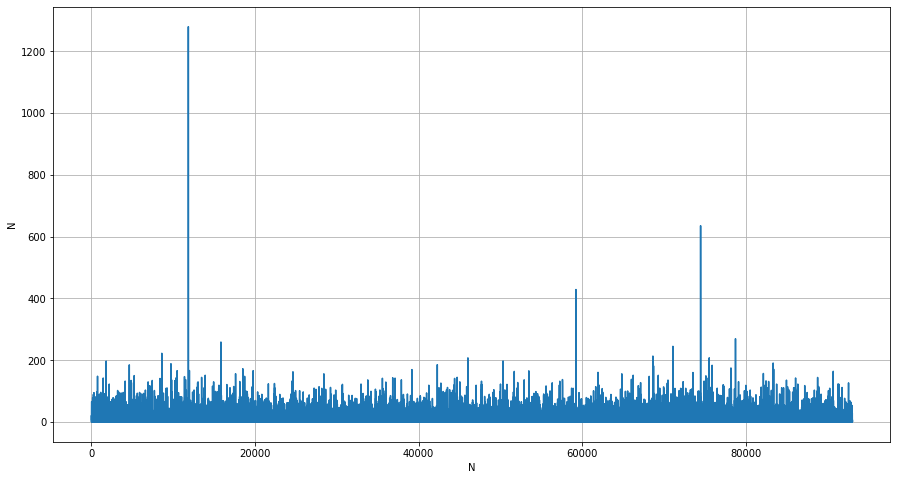

In [17]:
plt.figure(figsize=(15,8))
plt.figure(1)
plt.plot(res_escolaridad.resid**2)
plt.xlabel('N')
plt.ylabel('N')
plt.grid(True)
plt.show()

## 2- Ausencia de multicolinealidad: Teste de inflación de varianza VIF - FIV

In [19]:
#Ausencia de multicolinealidad: Test de inflación de varianza VIF - FIV
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = modelo_escolaridad.exog
vif = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]

round(pd.DataFrame(res_escolaridad.params),2)

,0
Intercept,11.44
"C(e1)[T.No, ninguno]",-4.87
"C(e1)[T.No, sólo escribe]",-1.21
"C(e1)[T.No, sólo lee]",-2.73
"C(e1)[T.Sí, lee y escribe]",0.69
C(o4)[T.No sabe/no responde],0.39
C(o4)[T.Sí],0.73
C(oficio1)[T.Empleados de oficina],1.88
C(oficio1)[T.Fuerzas Armada],2.24
C(oficio1)[T.Miembros del poder ejecutivo y de los cuerpos legislativo],2.72


In [20]:
get_ipython().magic('matplotlib inline')
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms

In [21]:
resid_val =  res_escolaridad.resid
fitted_val= res_escolaridad.predict()
## Expected mean of residuals
#E(resid) = 0
res_escolaridad.resid.mean()

-4.713612472830926e-10

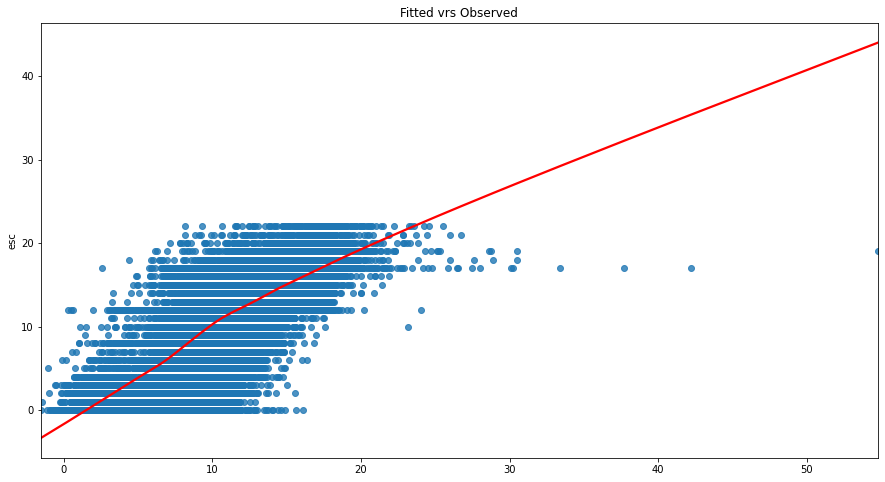

In [22]:
#Linearity in model
plt.figure(figsize=(15,8))
sns.regplot(x=fitted_val, y=df['esc'], lowess=True, line_kws={'color': 'red'})
plt.title('Fitted vrs Observed')
plt.show()

## Comprobacion de supuestos con statsmodel

In [23]:
from statsmodels.compat import lzip

import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import matplotlib.pyplot as plt

In [24]:
name = ['Jarque-Bera', 'Chi^2 two-tail prob.', 'Skew', 'Kurtosis']
test = sms.jarque_bera(res_escolaridad.resid)
lzip(name, test)

[('Jarque-Bera', 12313.47432093562),
 ('Chi^2 two-tail prob.', 0.0),
 ('Skew', -0.2830915728979748),
 ('Kurtosis', 4.6897221742638235)]

In [26]:
# Multicolinealidad 
np.linalg.cond(res_escolaridad.model.exog)

96064127.73653385

In [27]:
# Heterocedasticidad
name = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sms.het_breuschpagan(res_escolaridad.resid, res_escolaridad.model.exog)
lzip(name, test)

[('Lagrange multiplier statistic', 8775.423844665223),
 ('p-value', 0.0),
 ('f-value', 169.87867927384582),
 ('f p-value', 0.0)]

In [28]:
breuschpagan_p= sms.het_breuschpagan(res_escolaridad.resid, res_escolaridad.model.exog)[1]
print(breuschpagan_p)
if breuschpagan_p> 0.05:
  print("La relación no es heterocedástica")
if breuschpagan_p <0.05:
  print("La relación es heterocedastica")

#El valor p es lo suficientemente pequeño como para rechazar la hipótesis nula de que la varianza de los residuos 
#no depende de los valores de las variables de entrada. Por tanto, se supone que existe heterocedasticidad.

0.0
La relación es heterocedastica


C:\Python39\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
C:\Python39\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


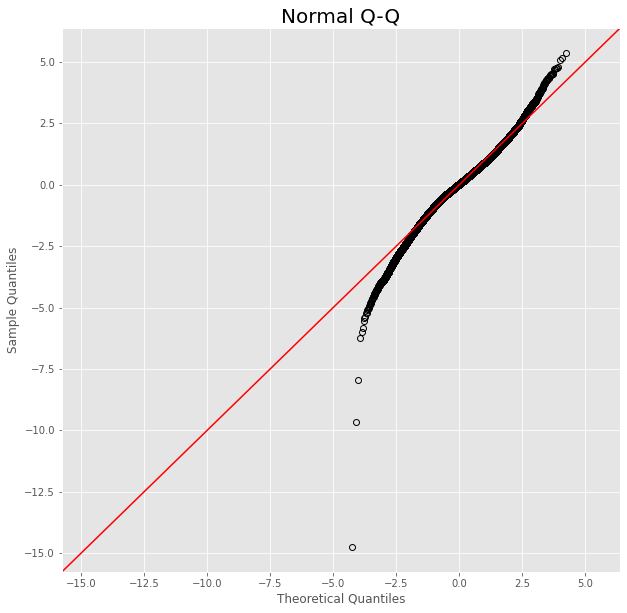

In [29]:
## Normalidad de los residuos
plt.rc('figure', figsize=(10,10))
plt.style.use('ggplot')

probplot = sm.ProbPlot(res_escolaridad.get_influence().resid_studentized_internal, fit=True)
fig = probplot.qqplot(line='45', marker='o', color='black',markerfacecolor='none')
plt.title('Normal Q-Q', fontsize=20)
plt.show()

C:\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Residuals')

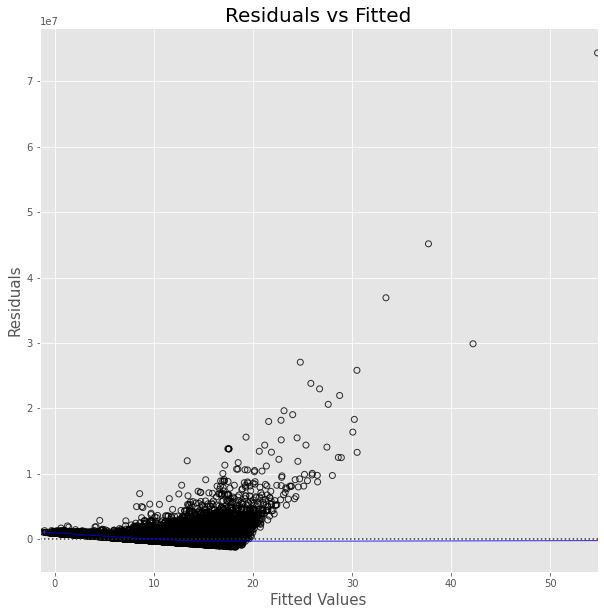

In [30]:
#Linealidad
sns.residplot(res_escolaridad.fittedvalues, 'ytrabajocor', data=df, 
                          lowess=True, 
                          scatter_kws={'facecolors':'none', 'edgecolors':'black'}, 
                          line_kws={'color': 'blue', 'lw': 1, 'alpha': 0.8})

plt.title('Residuals vs Fitted', fontsize=20)
plt.xlabel('Fitted Values', fontsize=15)
plt.ylabel('Residuals', fontsize=15)